# CS178 Homework 2

## Due Wednesday, February 1st, 2023

---
## Instructions


This homework (and subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it. 

Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You are encouraged to use these starter Jupyter notebooks to complete your assignment and to write your report. This will help you not only ensure that all of the code for the solutions is included, but also will provide an easy way to export your results to a PDF file (for example, doing *print preview* and *printing to pdf*). I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

**Double check that all of your answers are legible on Gradescope, e.g. make sure any text you have written does not get cut off.**

If you have any questions/concerns about using Jupyter notebooks, ask us on EdD. If you decide not to use Jupyter notebooks, but go with Microsoft Word or LaTeX to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.

### Summary of Assignment: 100 total points
- Problem 1: Linear Regression (30 points)
    - Problem 1.1: Load, partition, and display the problem data (5 points)
    - Problem 1.2: Train the model and plot the data along with its predictions (15 points)
    - Problem 1.3  Compute the MSE loss for the training and evaluation data (10 points)
    
- Problem 2: Feature transformations (40 points)
    - Problem 2.1: Train & display polynomial regression models using feature transforms (15 points)
    - Problem 2.2: Plot the training & evaluation error as a function of degree (10 points)
    - Problem 2.3: Select the best degree for these data (5 points)
    - Problem 2.4: Repeat your analysis using Fourier features (10 points)

- Problem 3: Cross-Validation (25 points)
    - Problem 3.1: Plot the five-fold cross validation error (10 points)
    - Problem 3.2: Select the best degree using cross-validation (5 points)
    - Problem 3.3: Compare cross-validation model selection to that in Problem 2 (10 points)
    
- Statement of Collaboration (5 points)

<center> <img src="http://sli.ics.uci.edu/extras/sep.png" alt="--------------------------------------------" width="200px" height="20px" style="width:200px;height:20px;"/> </center>

In [211]:
import numpy as np
import matplotlib.pyplot as plt   
%matplotlib inline

from sklearn.linear_model import LinearRegression    # Basic Linear Regression
from sklearn.linear_model import Ridge               # Linear Regression with L2 regularization

from sklearn.model_selection import train_test_split # Validation tools
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import KFold            # Cross-validation tools

from sklearn.preprocessing import PolynomialFeatures # Feature transformations
from sklearn.preprocessing import StandardScaler

import requests                                      # reading data
from io import StringIO

seed = 1234

# P1: Linear Regression
First, we'll load our data, and split it into training and evaluation blocks:

In [228]:
url = 'https://sli.ics.uci.edu/extras/cs178/data/curve80.txt'         # OR,
url = 'https://www.ics.uci.edu/~ihler/classes/cs178/data/curve80.txt'

with requests.get(url) as link: curve = np.genfromtxt(StringIO(link.text),delimiter=None)
    
X = curve[:,0:-1]      # extract features
Y = curve[:,-1]        # extract target values

# split into training and evaluation data
Xt, Xe, Yt, Ye = train_test_split(X, Y, test_size=0.25, random_state=seed)

### P1.1: Regression data shapes
How many data have you obtained for training ($X_t$)?  How many features do you have?  How many data have been partitioned off for evaluation ($X_e$)?

In [231]:
#How many data you obtained for training Xt.
print(f"There are {Xt.shape} many data we obtained for Xt training set with its feature.")

#How many data have been partitioned off for Xe's evaluation
print(f"There are {Xe.shape} many data have been partitioned off for Xe's evaluation with its feature.")

There are (60, 1) many data we obtained for Xt training set with its feature.
There are (20, 1) many data have been partitioned off for Xe's evaluation with its feature.


### P1.2: Train linear regression model
Now, let's train a simple linear regression model on the training data.  After training the model, plot the training data (colored blue), evaluation data (colored red), and our linear fit (a line) together on a single plot.  Also print out the coefficients (slope, `lr.coef_`, and intercept, `lr.intercept_`) of your model after fitting.

The slope of the model is: [0.77684721] 
The intercept of the fit model is -2.3463013180118275


<Figure size 600x400 with 0 Axes>

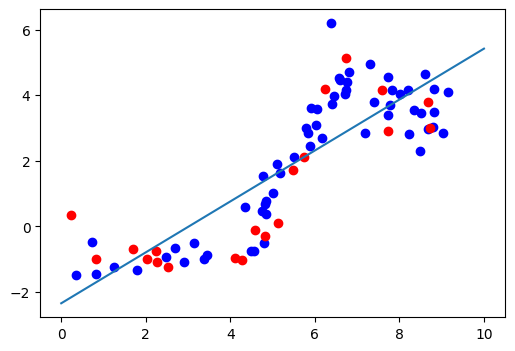

In [265]:
plt.figure(figsize=(6,4))
    
lr = LinearRegression().fit(Xt, Yt)      # create and fit model to training data

# to plot the prediction, we'll evaluate our model at a dense set of locations:
xs = np.linspace(0,10,200).reshape(-1,1)   # data points should be shape (m,1)
ys = lr.predict(xs)


plt.figure(figsize=(6,4))
plt.plot(xs, ys)                        # plot the data and linear fit
plt.scatter(Xt, Yt, color = 'b')
plt.scatter(Xe, Ye, color = 'r')


print(f"The slope of the model is: {lr.coef_} \nThe intercept of the fit model is {lr.intercept_}")                      # slope & intercept of your fit model

### P1.3 Evaluate your model's fit

Compute the mean squared error of your trained model on the training data (the data it was fit on) and the held-out evaluation data.

In [263]:
from sklearn.metrics import mean_squared_error

ye_pre = lr.predict(Xe)
yt_pre = lr.predict(Xt)

print(f"Mean squared error for Evaluation Data Set: {mean_squared_error(ye_pre, Ye)}")
print(f"Mean squared error for Training Data Set: {mean_squared_error(yt_pre, Yt)}")

Mean squared error for Evaluation Data Set: 1.6723519225582435
Mean squared error for Training Data Set: 1.270893125474928


## Problem 2: Feature Transformations

Often we will want to transform our data (as we saw in class).  A very simple version of this transformation is "noramlizing" the data, in which we shift and scale the feature values to a desirable range; typically, zero mean and unit variance, for example.  The ``StandardScaler()`` object in scikit-learn implements such a transformation.

Typically, a pre-processing transformation works in a similar way to training a model: we ``fit`` the object to our training data (in this case, computing the empirical mean and variance of the data), and save the parameters of the transformation (the shift and scale values) so that we can apply exactly the same transformation to subsequent data, for example when asked to predict on a new value of $x$.

So, for example:

In [239]:
scale = StandardScaler().fit(Xt)     # find the desired transformation
X_transformed = scale.transform(Xt)  # & apply it to the training data

# Now, we can train our model on X_transformed...
# lr = LinearRegression()...

# Before we predict, we also need to transform the test point's values:
ys = lr.predict(scale.transform(xs))

## P2.1: Train polynomial regression models
As mentioned in the homework, you can create additional features manually, e.g.,

In [240]:
Xt2 = np.zeros((Xt.shape[0],2))
Xt2[:,0] = Xt[:,0]
Xt2[:,1] = Xt[:,0]**2
print (Xt.shape)
print (Xt2.shape)
print (Xt2[0:6,:])   # look at a few data points to check:

(60, 1)
(60, 2)
[[ 0.72580645  0.526795  ]
 [ 2.4769585   6.13532341]
 [ 7.7304147  59.75931143]
 [ 9.0207373  81.37370144]
 [ 8.6751152  75.25762373]
 [ 6.4631336  41.77209593]]


or, you can create them using SciKit's PolynomialFeatures transform object:

In [241]:
Phi = PolynomialFeatures(degree=2,include_bias=False).fit(Xt)
Xt2 = Phi.transform(Xt)
print (Xt2[0:6,:])   # look at the same data points -- same values

[[ 0.72580645  0.526795  ]
 [ 2.4769585   6.13532341]
 [ 7.7304147  59.75931143]
 [ 9.0207373  81.37370144]
 [ 8.6751152  75.25762373]
 [ 6.4631336  41.77209593]]


**Now, try fitting** a linear regression model using different numbers of polynomial features of $x$.

For each degree $d \in \{0,1,3,5,7,10,15,18\}$:

- Fit a linear regression model using features consisting of all powers of $x$ up to degree $d$
    - Make sure you apply ``StandardScaler`` to the transformed data before training
- Plot the resulting prediction function $f(x)$, along with the training and validation data as before


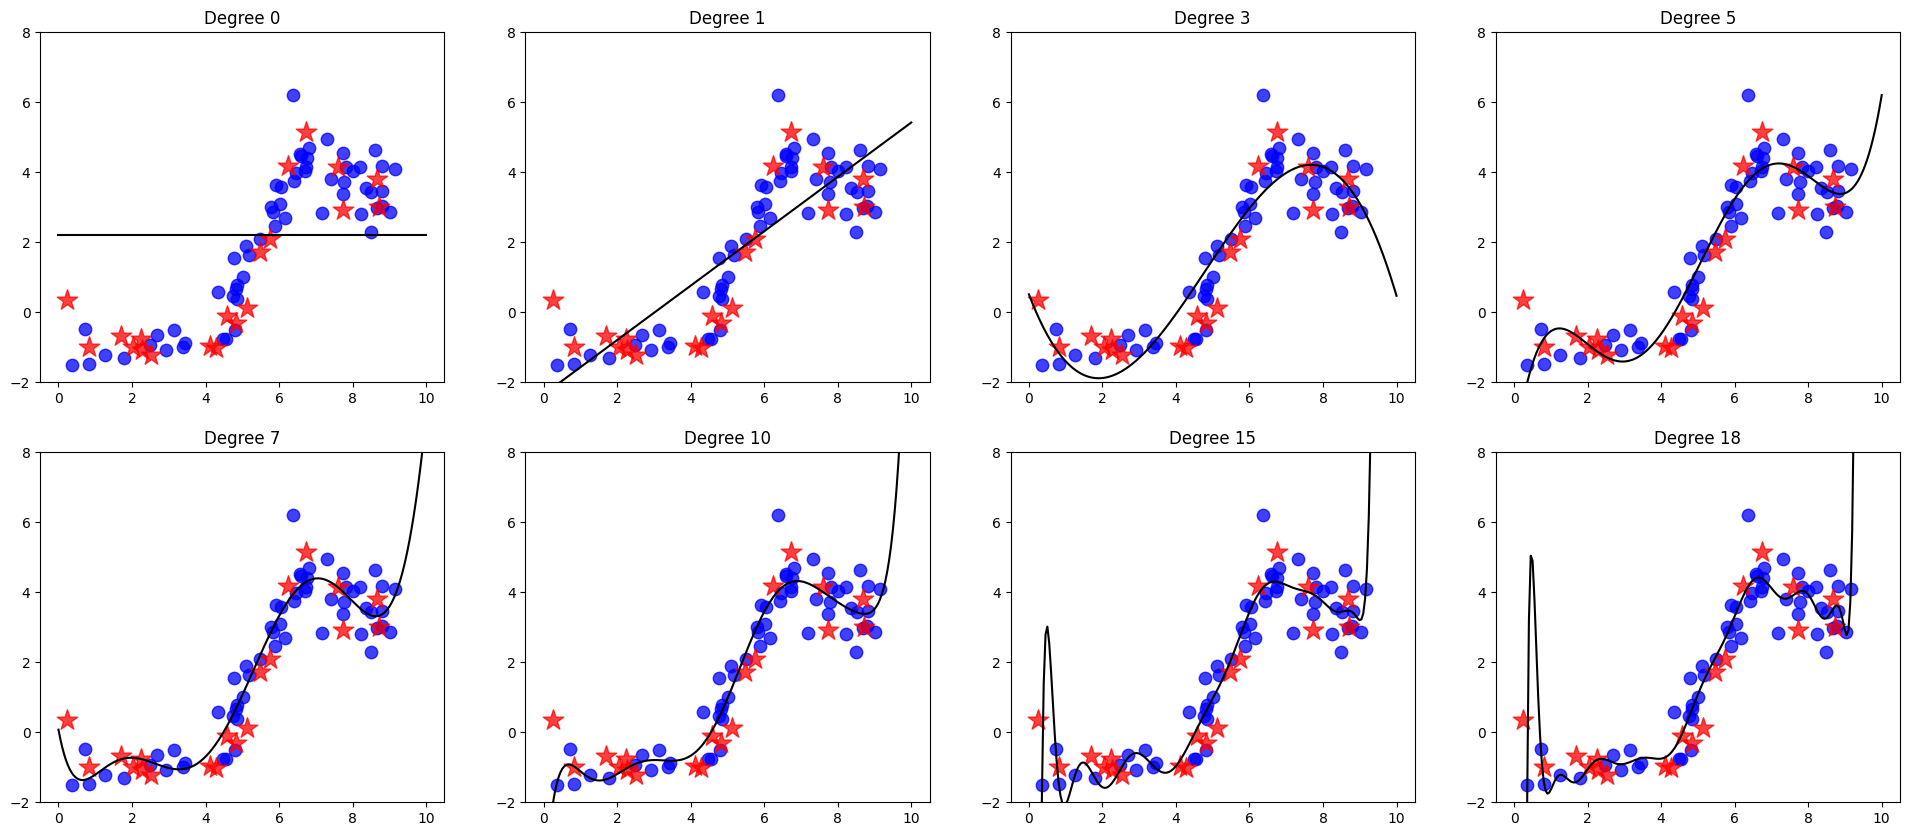

In [242]:
degrees = [0,1,3,5,7,10,15,18]
learners = [ [] ]*len(degrees)

fig, ax = plt.subplots(2,4, figsize=(24,10))

for i,degree in enumerate(degrees):
    # Create a polynomial feature expansion of degree d
    poly = PolynomialFeatures(degree,include_bias=True).fit(Xt)
    X_poly = poly.transform(Xt)
    # Use StandardScaler to rescale the transformed data
    scaler = StandardScaler().fit(X_poly)
    
    # Fit your linear regression and save it to "learners"
    lr = LinearRegression().fit(scaler.transform(X_poly), Yt)
    learners[i] = lr;
    
    xs = np.linspace(0,10,200).reshape(-1,1)
    xsi = poly.transform(xs)
    ys = lr.predict(scaler.transform(xsi))

    axi = ax[i//4,i%4]
    axi.plot(xs, ys, color='black')
    
    axi.scatter(Xt, Yt, s=80, color='blue', alpha=0.75, label='Train')
    axi.scatter(Xe, Ye, s=240, marker='*', color='red', alpha=0.75, label='Test')

    #axi.scatter(Xt, Yt)
    
    # you'll want to set a consistent y-scale for comparison
    axi.set_ylim(-2,8)        
    # don't forget to label your plots
    axi.set_title("Degree {}".format(degree))  

## P2.2 Model Performance
Compute the mean squared error (MSE) loss of each of your trained models on both the training data and the evaluation data.  Plot these errors as a function of degree (so, degree along the horizontal axis, MSE loss as the vertical axis).

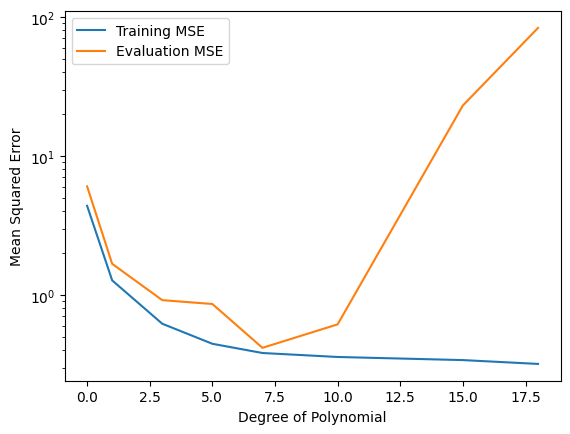

In [248]:
mse_train = [0]*len(degrees)
mse_test = [0]*len(degrees)

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree, include_bias=True).fit(Xt)
    Xt_poly = poly.transform(Xt)
    Xe_poly = poly.transform(Xe)
    
    scaler_test = StandardScaler().fit(Xt_poly)

    Xt_n = scaler_test.transform(Xt_poly)    
    Xe_n = scaler_test.transform(Xe_poly)
    
    lr = LinearRegression().fit(Xt_n, Yt)    
    
    ys_t = lr.predict(Xt_n)
    ys_e = lr.predict(Xe_n)
    
    mse_train[i] = mse(ys_t, Yt)
    mse_test[i] = mse(ys_e, Ye)
    

plt.semilogy(degrees, mse_train, label='Training MSE')
plt.semilogy(degrees, mse_test, label='Evaluation MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

## P2.3 Model Selection
Which degree would you select to use?

In [251]:
print("Degree 7 is an appropriate degree to choose. The reason is that after degree 7, the evaluation error goes high in terms of Mean Squared Error. However, At degree 7, it has the lowest MSE.")

Degree 7 is an appropriate degree to choose. The reason is that after degree 7, the evaluation error goes high in terms of Mean Squared Error. However, At degree 7, it has the lowest MSE.


## 2.4: Fourier Features

Polynomial features are a common choice, but the same type of procedure can be used with many different types of features.  In this problem, we'll instead use "Fourier-like" frequency-based features. (See, for example, https://en.wikipedia.org/wiki/Discrete_Fourier_transform for more on discrete Fourier transforms.)

We first write a function that does the frequency expansion; otherwise, your code will be similar to before:

In [252]:
def Fourier(X,k):
    XX = np.zeros((X.shape[0],1+2*k))
    XX[:,0] = X[:,0]            # we'll keep the original scalar feature for convenience
    for p in range(1,k+1): 
        XX[:,2*p-1]= np.sin(X[:,0]*p*2*np.pi/10)  # and add sine & cosine features
        XX[:,2*p]  = np.cos(X[:,0]*p*2*np.pi/10)  # "10" is the range of x-values we're interested in
    return XX

We can just get a quick sense of what these features will look like:

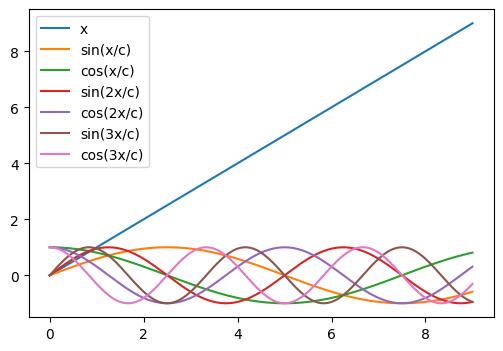

In [253]:
plt.figure(figsize=(6,4))
xs = np.linspace(0,9,200).reshape(-1,1)   # get some point locations for plotting
plt.plot(xs,Fourier(xs,3));               # try with 3 pairs of frequency features
plt.legend(['x','sin(x/c)','cos(x/c)','sin(2x/c)','cos(2x/c)','sin(3x/c)','cos(3x/c)']);

Now, repeat your evaluation of P2.1 ... P2.3, but using these Fourier features instead of polynomial features.  Try fitting the model using $k=0$ to $k=5$, and show the prediction plots and the training/validation error curves to select the best number of features to add.

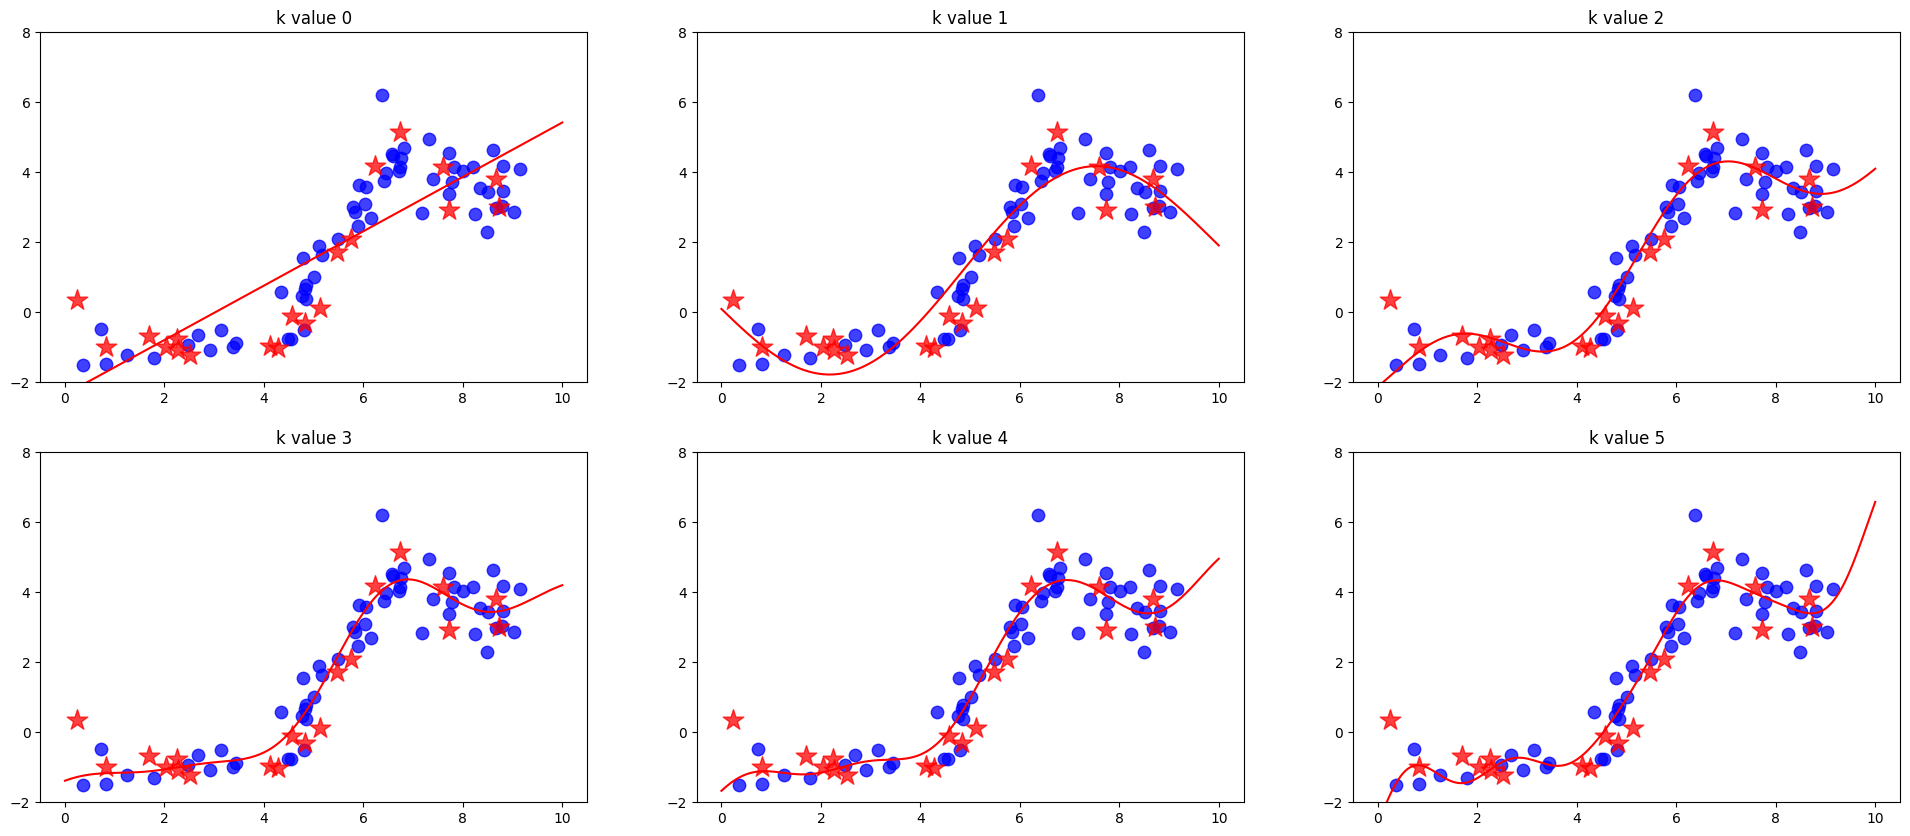

In [254]:
kvalues = [0,1,2,3,4,5]
learnersF = [ [] ]*len(kvalues)

fig, ax = plt.subplots(2,3, figsize=(24,10))

train_errorsF = []
test_errorsF = []

for i,k in enumerate(kvalues):
    # Apply the Fourier feature expansion with k frequencies
    F_train = Fourier(Xt, k)
    # Use StandardScaler to rescale the transformed data
    scaler_train = StandardScaler().fit(F_train)
    # Fit your linear regression and save it to "learners"
    lr_train = LinearRegression().fit(scaler_train.transform(F_train), Yt)
    learnersF[i] = lr_train
    
    # Evaluate your training and test errors
    xs = np.linspace(0,10,200).reshape(-1,1)
    F_xs = Fourier(xs, k)
    F_xsi = scaler_train.transform(F_xs)
    ys = learnersF[i].predict(F_xsi)
    
    Yt_pred = learnersF[i].predict(scaler_train.transform(F_train))
    train_errorsF.append(mse(Yt, Yt_pred))

    F_test = Fourier(Xe, k)
    F_test_scaled = scaler_train.transform(F_test)
    Ye_pred = learnersF[i].predict(F_test_scaled)
    test_errorsF.append(mse(Ye, Ye_pred))

    axi = ax[i//3,i%3]
    axi.scatter(Xt, Yt, s=80, color='blue', alpha=0.75, label='Train')
    axi.scatter(Xe, Ye, s=240, marker='*', color='red', alpha=0.75, label='Test')
    axi.plot(xs, ys, color='r')  # plot the data and your prediction function
    axi.set_ylim(-2,8)       # you'll want to set a consistent y-scale for comparison
    axi.set_title("k value {}".format(k))           # don't forget to label your plots

 

and finally, plot the training and validation MSE scores of your six frequency-based models:

Text(0, 0.5, 'Mean Squared Error')

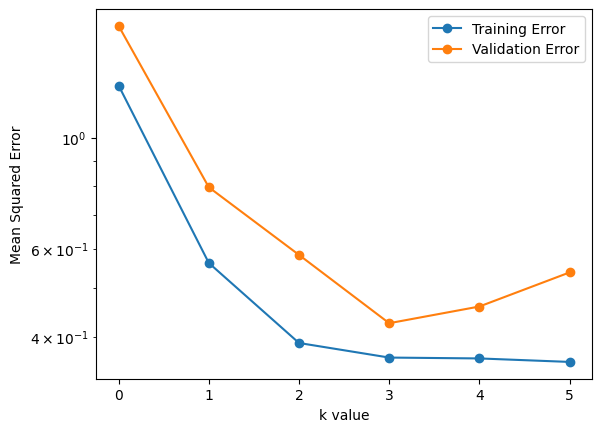

In [255]:
plt.semilogy(kvalues, train_errorsF, '-o', label='Training Error')
plt.semilogy(kvalues, test_errorsF, '-o', label='Validation Error')
plt.legend(loc='upper right')
plt.xlabel('k value')
plt.ylabel('Mean Squared Error')

# P3: Cross-validation
Cross validation is another method of model complexity assessment.  We use it only to determine the correct setting of complexity parameters ("hyperparameters"), such as how many and which features to use, or parameters like "k" in KNN, for which training error alone provides little information.  In particular, cross validation will not produce a model, only a setting of the hyperparameter values that cross-validation thinks will lead to a model with low test error.

## P3.1:  5-Fold Cross-validation

In the previous problem, we decided what degree of polynomial fit to use based on the performance on a held-out set of test data.  Now suppose that we do not have access to the target values of those data.  How can we determine the best degree?  

We could perform another split; but since this is reducing the number of data available, let us instead use cross-validation to evaluate the degrees.  Cross-validation works by splitting the training data $X_T$ multiple times, one for eack of the $K$ partitions (``n_splits`` in the code), and repeat our entire training and evaluation procedure on each split:

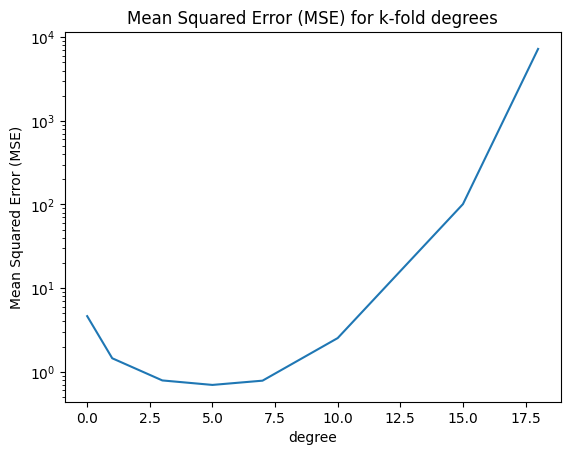

In [258]:
mse_xval = [ 0. ]*len(degrees)

for i, degree in enumerate(degrees):
    test_errorsF = []
    xval = KFold(n_splits = 5)

    for train_index, val_index in xval.split(Xt):
        # Extract the ith cross-validation fold (training/validation split)
        Xti,Xvi,Yti,Yvi = Xt[train_index],Xt[val_index],Yt[train_index],Yt[val_index]
    
        # Now, build the model:
        
        # Create a polynomial feature expansion
        poly_train = PolynomialFeatures(degree, include_bias=True).fit(Xti)
        #poly_val = PolynomialFeatures(degree, include_bias=True).fit(Xvi)
        
        # Create a StandardScaler
        Xti_poly = poly_train.transform(Xti)
        scaler_train = StandardScaler().fit(Xti_poly)
        Xti_poly_scaled = scaler_train.transform(Xti_poly)
        
        Xvi_poly = poly_train.transform(Xvi)
        Xvi_poly_scaled = scaler_train.transform(Xvi_poly)
        
        # Fit the linear regression model on the training folds, Xti/Yti
        lr = LinearRegression().fit(Xti_poly_scaled, Yti)
        
        # Compute the MSE on the evaluation fold, Xvi/Yvi
        Yvi_pred = lr.predict(Xvi_poly_scaled)
        test_errorsF.append(mse(Yvi, Yvi_pred))
    # Evaluate by averaging the MSE across the five folds
    mse_xval[i] = sum(test_errorsF) / len(test_errorsF)

# Plot the estimated MSE from cross-validation as a function of the degree
plt.semilogy(degrees, mse_xval)
plt.xlabel('degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for k-fold degrees')
plt.show()

## P3.2: Cross-validation model selection

What degree would you choose based on the cross validation performance?

In [261]:
print("I would choose the degree 5. Since it has the lowest 5-fold MSE.")

I would choose the degree 5. Since it has the lowest 5-fold MSE.


## P3.3 Comparison to test performance

How do the MSE estimates from 5-fold cross-validation compare to the estimated test performance you found from your held-out data, $X_E$?  Explain briefly.

In [260]:
print("With 5-fold cross-validation, we use the different portions of the data and it is visible that the MSE graph line is much more smooth compared to polynomial regression model.") 

With 5-fold cross-validation, we use the different portions of the data and it is visible that the MSE graph line is much more smooth compared to polynomial regression model.


---
### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration.

In [ ]:
#Cem Emir Senyurt and Daniel Turpitka
#We had some talks about the polynomial regression models and the way we plot them. 